x_data shape: (1762, 4)
y_data shape: (1762, 1)
Feature names: ['open', 'low', 'high', 'volume']
1. Data Analysis


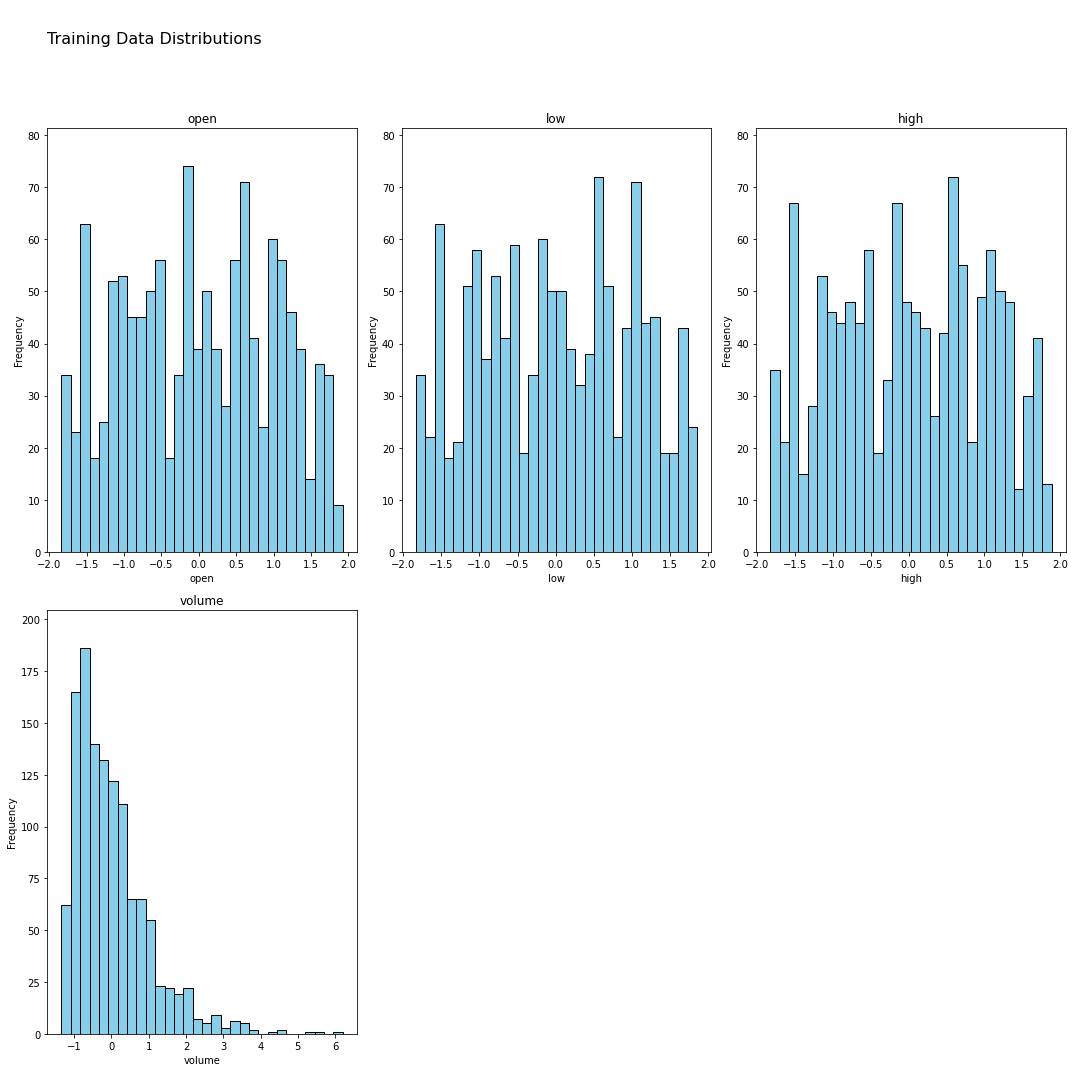

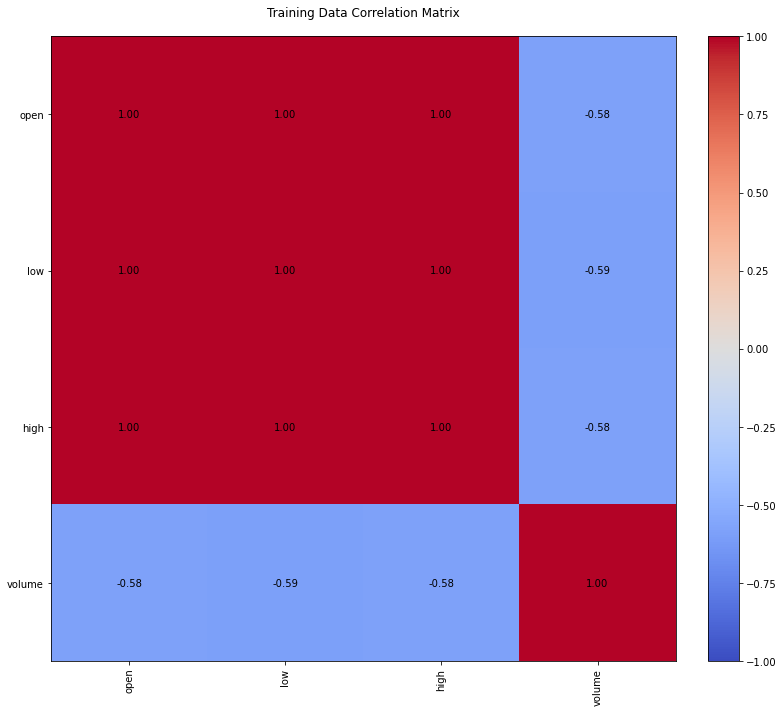

2. Training Models
Total configurations: 243
Training model 1/243 with parameters:
Config indices: (0, 0, 0, 0, 0)
{'hidden_sizes': [32, 16, 8], 'optimizer': <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>, 'learning_rate': 0.01, 'batch_size': 16, 'epoch': 100}
Epoch 1, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 11, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 21, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 31, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 41, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 51, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 61, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 71, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 81, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Epoch 91, Training Loss: nan, Validation Loss: nan, Test Loss: nan
Optimizer: GradientDescentOptimizer, L

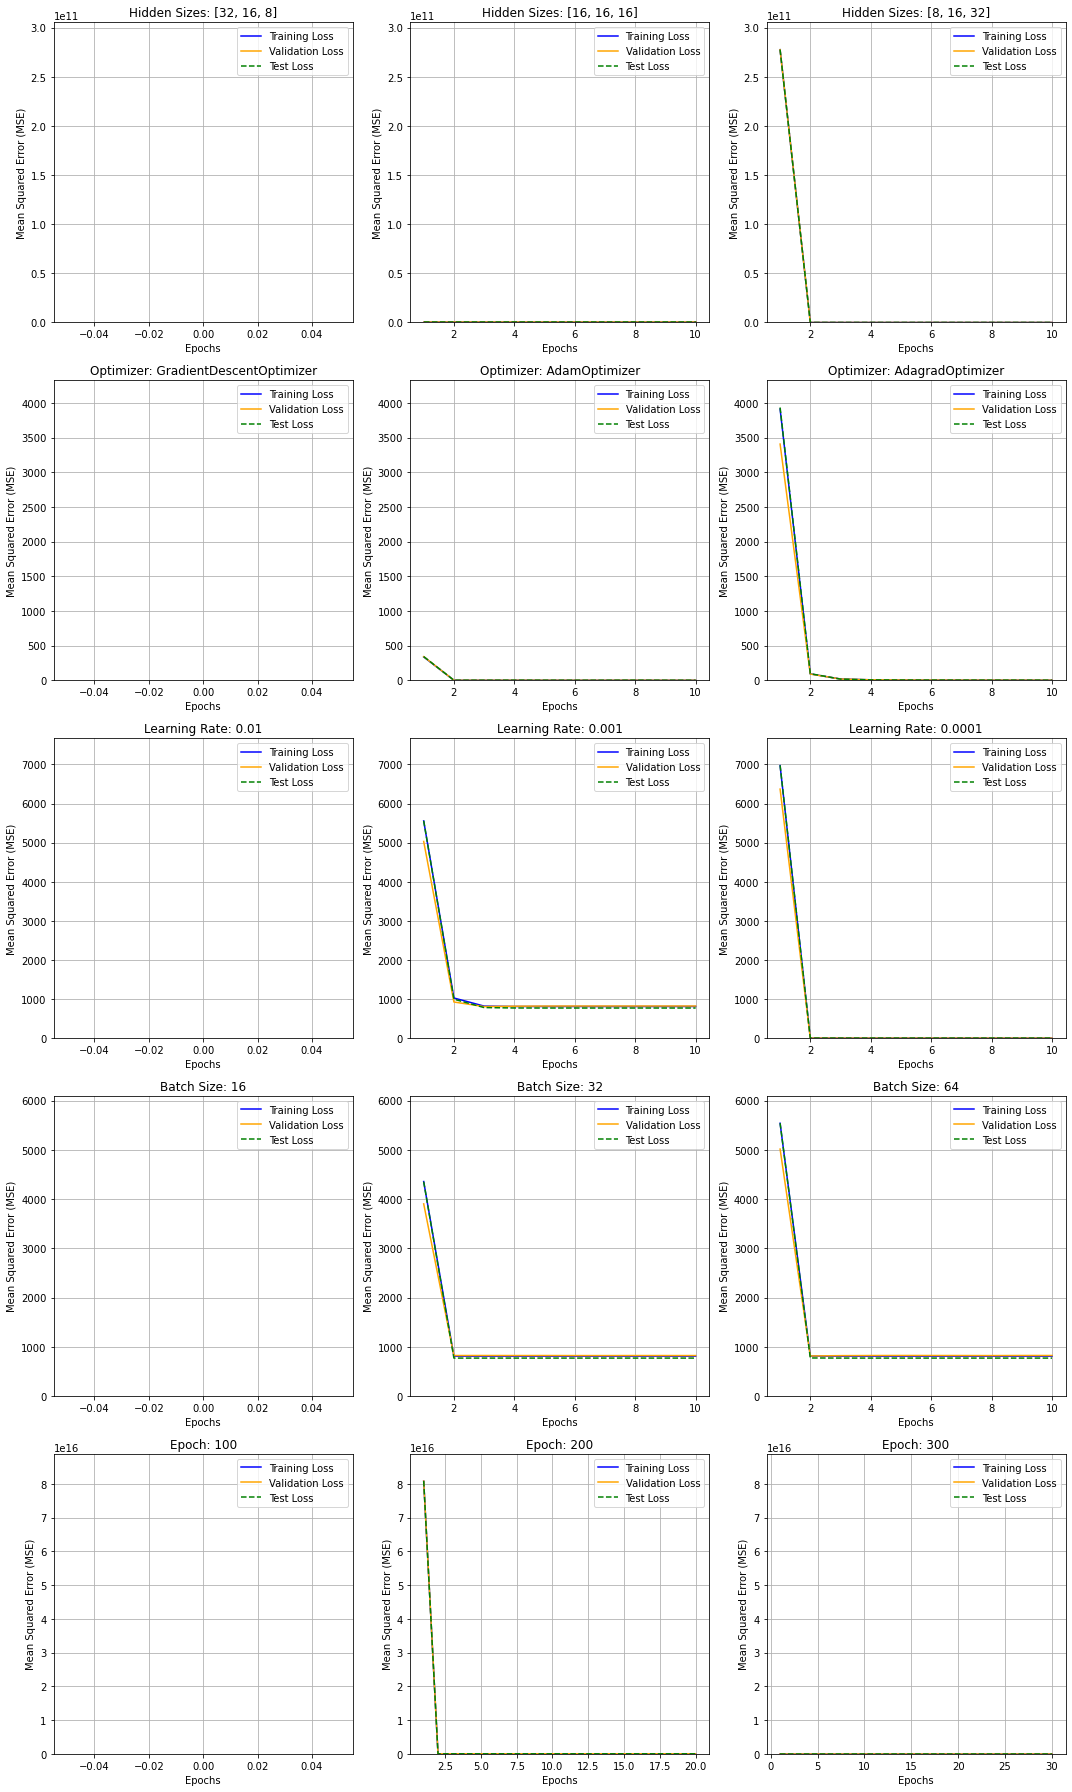

3. Conclusion
[Best Parameters]
Optimizer: GradientDescentOptimizer
Learning rate: 0.01
Hidden sizes: [32, 16, 8]
Batch size: 16
Epochs: 100
Training loss: nan
Validation loss: nan
Test loss: nan


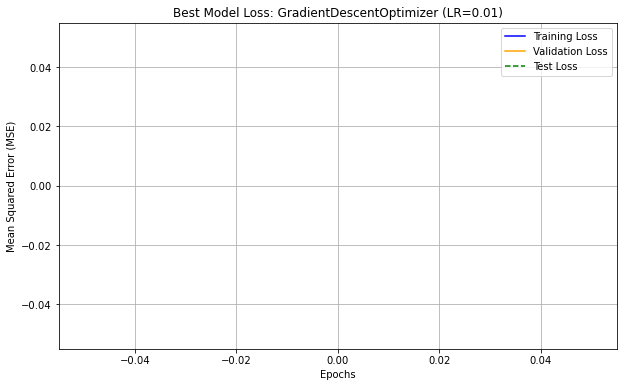

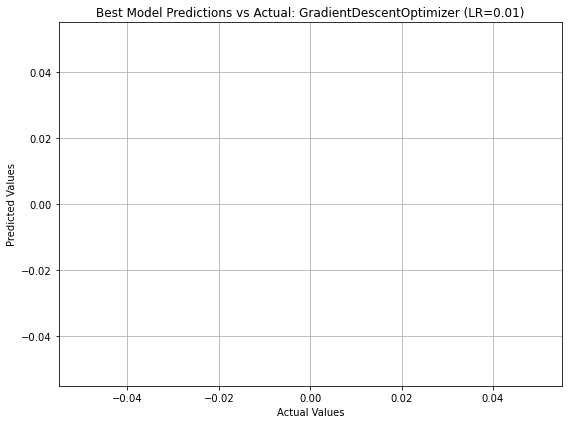


Sample of Actual Values vs Predicted Values:
Actual: 74.4171, Predicted: nan
Actual: 45.4671, Predicted: nan
Actual: 54.7971, Predicted: nan
Actual: 94.6771, Predicted: nan
Actual: 111.7900, Predicted: nan
Actual: 72.2986, Predicted: nan
Actual: 90.2800, Predicted: nan
Actual: 49.6571, Predicted: nan
Actual: 75.7771, Predicted: nan
Actual: 98.6300, Predicted: nan


In [6]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.pyplot as plt

########################
# Data

def load_csv(file_path):
    # 첫 번째 행(헤더) 읽기
    with open(file_path, 'r') as f:
        header = f.readline().strip().split(',')

    # 데이터 로드 (첫 번째 행 제외, 'open', 'close', 'low', 'high', 'volume' 열만 사용)
    # 열 인덱스: 0=date, 1=symbol, 2=open, 3=close, 4=low, 5=high, 6=volume
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1, usecols=(2, 3, 4, 5, 6))

    # 입력 변수: open, low, high, volume
    x_data = data[:, [0, 2, 3, 4]]  # 열 인덱스 0=open, 2=low, 3=high, 4=volume
    # 타겟 변수: close
    y_data = data[:, 1].reshape(-1, 1)  # 열 인덱스 1=close

    # 특성 이름
    feature_names = ['open', 'low', 'high', 'volume']

    return x_data, y_data, feature_names

def split_data(x_data, y_data):
    # 데이터셋을 학습, 검증, 테스트로 나누기
    # 전체 데이터의 20%를 테스트 데이터로 사용
    x_temp, x_test, y_temp, y_test = train_test_split(
        x_data, y_data, test_size=0.2, random_state=42)
    
    # 테스트 데이터를 제외한 나머지 데이터의 12.5%를 검증 데이터로 사용
    x_train, x_val, y_train, y_val = train_test_split(
        x_temp, y_temp, test_size=0.125, random_state=42)
    
    # 표준화 (스케일링)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_val = sc.transform(x_val)
    x_test = sc.transform(x_test)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

########################
# Data Analysis

def draw_data_distributions(data, feature_names, title, num_print_columns=3):
    print(f'1. Data Analysis')  # 대제목 출력
    num_columns = data.shape[1]
    num_rows = (num_columns + num_print_columns - 1) // num_print_columns

    fig, figures = plt.subplots(num_rows + 1, num_print_columns, figsize=(15, 5 * (num_rows + 1)), 
                                gridspec_kw={'height_ratios': [0.3] + [2] * num_rows})

    # 소제목을 첫 번째 행에 왼쪽 정렬로 추가
    figures[0, 0].text(0, 0.5, f'{title}', fontsize=16, ha='left', va='center')
    for j in range(num_print_columns):
        figures[0, j].axis('off')

    # 각 행별로 최대 y값을 계산하여 동일한 y축 범위 설정
    for row in range(1, num_rows + 1):
        # 해당 행의 모든 그래프에 대한 최대 y값 찾기
        max_y = 0
        for col in range(num_print_columns):
            i = (row - 1) * num_print_columns + col
            if i < num_columns:
                counts, _ = np.histogram(data[:, i], bins=30)
                current_max = counts.max()
                if current_max > max_y:
                    max_y = current_max
        
        # 각 그래프에 히스토그램 그리기 및 y축 범위 설정
        for col in range(num_print_columns):
            i = (row - 1) * num_print_columns + col
            if i < num_columns:
                figure = figures[row, col]
                figure.hist(data[:, i], bins=30, color='skyblue', edgecolor='black')
                figure.set_title(f'{feature_names[i]}')
                figure.set_xlabel(f'{feature_names[i]}')
                figure.set_ylabel('Frequency')
                figure.set_ylim(0, max_y + max_y * 0.1)  # 최대 y값의 110%로 설정

    # 남은 빈 플롯 비활성화
    for i in range(num_columns, num_rows * num_print_columns):
        row = (i // num_print_columns) + 1
        col = i % num_print_columns
        figures[row, col].axis('off')

    plt.tight_layout()
    plt.show()

def draw_correlation_matrix(x, feature_names, title=None):
    # 상관계수 행렬 계산
    corr_matrix = np.corrcoef(x, rowvar=False)
    # 특성 수
    num_features = x.shape[1]
    # 레이블 설정
    feature_labels = feature_names
    
    # 히트맵 시각화
    plt.figure(figsize=(12, 10))
    im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # 축 레이블 설정
    plt.xticks(range(num_features), feature_labels, rotation=90)
    plt.yticks(range(num_features), feature_labels)
    
    # 각 셀에 상관계수 표시
    for i in range(num_features):
        for j in range(num_features):
            text = f"{corr_matrix[i, j]:.2f}"
            plt.text(j, i, text,
                     ha="center", va="center", color="black")
    
    # 제목 설정
    if title:
        plt.title(title, pad=20)
    
    plt.tight_layout()
    plt.show()

########################
# Learning

def create_graph(optimizer, input_num, hidden_sizes):
    tf.reset_default_graph()  # 그래프 초기화
    
    x = tf.placeholder(tf.float32, [None, input_num], name='x')  # 입력 데이터 플레이스홀더
    y = tf.placeholder(tf.float32, [None, 1], name='y')  # 레이블 데이터 플레이스홀더 (회귀 문제)

    # 은닉층 생성
    layer_input = x
    layer_input_size = input_num

    for idx, hidden_size in enumerate(hidden_sizes):
        W_hidden = tf.Variable(tf.random_normal([layer_input_size, hidden_size], stddev=0.1),
                               name=f'W_hidden_{idx+1}')
        b_hidden = tf.Variable(tf.zeros([hidden_size]), name=f'b_hidden_{idx+1}')
        layer_output = tf.nn.relu(tf.matmul(layer_input, W_hidden) + b_hidden, name=f'relu_{idx+1}')

        # 다음 층을 위한 입력 업데이트
        layer_input = layer_output
        layer_input_size = hidden_size

    # 출력층
    W_output = tf.Variable(tf.random_normal([layer_input_size, 1], stddev=0.1), name='W_output')
    b_output = tf.Variable(tf.zeros([1]), name='b_output')
    prediction = tf.matmul(layer_input, W_output) + b_output  # 예측값 계산
    loss = tf.reduce_mean(tf.square(y - prediction))  # MSE 손실 계산
    train_step = optimizer.minimize(loss)  # 최적화 수행

    return x, y, prediction, loss, train_step

def execute_graph(x, y, prediction, loss, train_step, data, epoch, batch_size):
    train_losses = []
    val_losses = []
    test_losses = []

    x_train, x_val, x_test, y_train, y_val, y_test = data
   
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())  # 변수 초기화
        for e in range(1, epoch + 1):
            # 학습 데이터 셔플
            permutation = np.random.permutation(len(x_train))
            x_train_shuffled = x_train[permutation]
            y_train_shuffled = y_train[permutation]

            num_batches = (len(x_train) + batch_size - 1) // batch_size
            
            for i in range(num_batches):
                start_idx = i * batch_size
                end_idx = min((i+1) * batch_size, len(x_train))
                batch_x = x_train_shuffled[start_idx:end_idx]
                batch_y = y_train_shuffled[start_idx:end_idx]
                sess.run(train_step, feed_dict={x: batch_x, y: batch_y})

            if e % 10 == 1:
                # 손실 계산
                train_loss = sess.run(loss, feed_dict={x: x_train, y: y_train})
                val_loss = sess.run(loss, feed_dict={x: x_val, y: y_val})
                test_loss = sess.run(loss, feed_dict={x: x_test, y: y_test})

                train_losses.append(train_loss)
                val_losses.append(val_loss)
                test_losses.append(test_loss)
                print(f'Epoch {e}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}')
       
        # 최종 예측 수행
        predictions = sess.run(prediction, feed_dict={x: x_test})

    return train_losses, val_losses, test_losses, predictions

########################
# Visualization Functions

def draw_loss(figure, train_losses, val_losses, test_losses, title=None, y_lim=None):
    if len(train_losses) > 0:
        epochs = range(1, len(train_losses) + 1)
        figure.plot(epochs, train_losses, label='Training Loss', color='blue')
        figure.plot(epochs, val_losses, label='Validation Loss', color='orange')
        figure.plot(epochs, test_losses, label='Test Loss', color='green', linestyle='--')
        figure.set_xlabel('Epochs')
        figure.set_ylabel('Mean Squared Error (MSE)')
        if title is not None:
            figure.set_title(f'{title}')
        figure.legend()
        figure.grid(True)
        if y_lim:
            figure.set_ylim(y_lim)

def draw_predictions_scatter(y_true, y_pred, title=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='purple', edgecolor='k')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    if title is not None:
        plt.title(f'{title}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

########################
# Helper Function for Formatting Titles

def format_param_title(param_name, param_value):
    if param_name == 'optimizer':
        return f"{param_name.replace('_', ' ').title()}: {param_value.__name__}"
    elif param_name == 'hidden_sizes':
        return f"{param_name.replace('_', ' ').title()}: {param_value}"
    else:
        return f"{param_name.replace('_', ' ').title()}: {param_value}"

########################
# Main Learning Function

# 모델 학습 및 결과 도출
def learn(data, param_grid):
    x_train = data[0]
    best_report = None

    # 모든 가능한 하이퍼파라미터 조합 생성
    param_keys = list(param_grid.keys())
    param_values = [param_grid[key] for key in param_keys]
    all_configurations = list(itertools.product(*param_values))
    print('2. Training Models')
    print(f"Total configurations: {len(all_configurations)}")

    # 하이퍼파라미터 중 가장 많은 옵션을 가진 것을 기준으로 컬럼 수 결정
    num_columns = max(len(options) for options in param_grid.values())
    num_rows = len(param_keys)
    
    # 시각화를 위한 구성 인덱스 수집
    plot_config_indices = {}
    for param_idx, key in enumerate(param_keys):
        options_length = len(param_grid[key])
        configs = []
        for idx in range(options_length):
            config_indices = [0] * len(param_keys)
            config_indices[param_idx] = idx
            configs.append(tuple(config_indices))
        plot_config_indices[param_idx] = configs

    # 모든 구성의 결과 저장
    results = {}
    for idx, config_values in enumerate(all_configurations):
        params = dict(zip(param_keys, config_values))
        config_indices = tuple(param_grid[key].index(value) for key, value in params.items())
        print(f"Training model {idx+1}/{len(all_configurations)} with parameters:")
        print(f"Config indices: {config_indices}")
        print(params)

        optimizer_class = params['optimizer']
        learning_rate = params['learning_rate']
        hidden_sizes = params['hidden_sizes']
        epoch = params['epoch']
        batch_size = params['batch_size']

        optimizer = optimizer_class(learning_rate=learning_rate)
        
        # 그래프 생성
        x, y, prediction, loss, train_step = create_graph(
            optimizer, x_train.shape[1], hidden_sizes)
                
        # 그래프 실행
        train_losses, val_losses, test_losses, predictions = execute_graph(
            x, y, prediction, loss, train_step, data, epoch, batch_size)

        # 결과 출력
        print(f"Optimizer: {optimizer_class.__name__}, Learning rate: {learning_rate}")
        print(f"Hidden sizes: {hidden_sizes}, Batch size: {batch_size}, Epochs: {params['epoch']}")
        if len(train_losses) > 0:
            print(f"Training loss: {train_losses[-1]:.4f}")
            print(f"Validation loss: {val_losses[-1]:.4f}")
            print(f"Test loss: {test_losses[-1]:.4f}\n")
        else:
            print(f"No loss recorded. Check the epoch increments.\n")

        # 최고 성능 모델 업데이트
        if best_report is None or (len(test_losses) > 0 and test_losses[-1] < best_report['test_losses'][-1]):
            best_report = {
                "params": params,
                "train_losses": train_losses,
                "val_losses": val_losses,
                "test_losses": test_losses,
                "predictions": predictions,
                "y_test": data[-1]
            }
            
        # 모든 구성의 결과 저장
        results[config_indices] = {
            "params": params,
            "train_losses": train_losses,
            "val_losses": val_losses,
            "test_losses": test_losses,
        }

        print("-" * 80)
        
    # 지정된 구성을 시각화
    # 서브플롯 준비
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))
    plt.subplots_adjust(hspace=0.5)

    # 서브플롯이 2D 배열이 되도록 조정 (단일 행 또는 열인 경우)
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)
    if num_columns == 1:
        axes = np.expand_dims(axes, axis=1)

    for param_idx, configs in plot_config_indices.items():
        # 각 행의 최대 손실 값 찾기
        max_loss = 0
        for config_indices in configs:
            result = results.get(config_indices)
            if result:
                current_max = max(result['train_losses'] + result['val_losses'] + result['test_losses'])
                if current_max > max_loss:
                    max_loss = current_max
        # y_lim 설정 (최대 손실 값의 110%)
        y_lim = (0, max_loss * 1.1) if max_loss > 0 else None

        for col_index, config_indices in enumerate(configs):
            row_index = param_idx
            ax = axes[row_index, col_index]

            result = results.get(config_indices)
            if result:
                param_name = param_keys[param_idx]
                param_value = param_grid[param_name][config_indices[param_idx]]
                formatted_title = format_param_title(param_name, param_value)
                draw_loss(
                    ax,
                    result['train_losses'],
                    result['val_losses'],
                    result['test_losses'],
                    title=formatted_title,
                    y_lim=y_lim
                )
            else:
                ax.axis('off')

    plt.tight_layout()
    plt.show()
    return best_report

########################
# Report

def generate_report(report):
    if report is None:
        print("No report to generate.")
        return

    params = report['params']
    
    print('3. Conclusion')
    print(f"[Best Parameters]")
    print(f"Optimizer: {params['optimizer'].__name__}")
    print(f"Learning rate: {params['learning_rate']}")
    print(f"Hidden sizes: {params['hidden_sizes']}")
    print(f"Batch size: {params['batch_size']}")
    print(f"Epochs: {params['epoch']}")
    if len(report['train_losses']) > 0:
        print(f"Training loss: {report['train_losses'][-1]:.4f}")
        print(f"Validation loss: {report['val_losses'][-1]:.4f}")
        print(f"Test loss: {report['test_losses'][-1]:.4f}")

    # 손실 시각화
    fig, ax = plt.subplots(figsize=(10, 6))
    draw_loss(ax, report['train_losses'], report['val_losses'], report['test_losses'],
              title=f"Best Model Loss: {params['optimizer'].__name__} (LR={params['learning_rate']})")
    plt.show()

    # 예측 vs 실제 값 시각화
    y_test = report['y_test']
    predictions = report['predictions']
    draw_predictions_scatter(y_test.flatten(), predictions.flatten(),
                             title=f"Best Model Predictions vs Actual: {params['optimizer'].__name__} (LR={params['learning_rate']})")

    # 실제 값과 예측 값 출력
    print("\nSample of Actual Values vs Predicted Values:")
    for actual, predicted in zip(y_test.flatten()[:10], predictions.flatten()[:10]):
        print(f"Actual: {actual:.4f}, Predicted: {predicted:.4f}")

########################
# 파라미터 그리드 설정

# 하이퍼파라미터 그리드 설정
param_grid = {    
    'hidden_sizes': [[32, 16, 8], [16, 16, 16], [8, 16, 32]],
    'optimizer': [tf.train.GradientDescentOptimizer, tf.train.AdamOptimizer, tf.train.AdagradOptimizer],
    'learning_rate': [0.0001, 0.0001, 0.00001],
    'batch_size': [16, 32, 64],
    'epoch': [100, 300, 500]
}

########################
# 메인 실행 흐름

def main():
    # 데이터 로드 및 전처리
    x_data, y_data, feature_names = load_csv('aapl_prices.csv')
    print(f"x_data shape: {x_data.shape}")
    print(f"y_data shape: {y_data.shape}")
    print(f"Feature names: {feature_names}")
    
    x_train, x_val, x_test, y_train, y_val, y_test = split_data(x_data, y_data)
    data = (x_train, x_val, x_test, y_train, y_val, y_test)

    # 1. Data Analysis: 데이터셋의 열 분포도 시각화
    draw_data_distributions(x_train, feature_names, title='Training Data Distributions', num_print_columns=3)
    
    # 2. Data Correlation Analysis: 데이터 상관관계 시각화 (타겟 변수 제외)
    draw_correlation_matrix(x_train, feature_names, title='Training Data Correlation Matrix')
    
    # Learning: 모델 학습 및 하이퍼파라미터 그리드 서치
    best_report = learn(data, param_grid)

    # Report: 최적 모델의 성능 보고
    generate_report(best_report)

if __name__ == "__main__":
    main()
